#### Iris Dataset KNN classification

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [5]:
 df.drop('Id', axis=1, inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df.drop('Species', axis=1)  # Drop target column
y = df['Species']  # Target column

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on testing data

In [19]:
k_values = [1, 3, 5, 7, 9, 11]

In [20]:
results = []

In [27]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append((k, accuracy, cm))
    
    

In [28]:
results_df = pd.DataFrame(results, columns=['K', 'Accuracy', 'Confusion Matrix'])
print(results_df)

    K  Accuracy                      Confusion Matrix
0  11  0.955556  [[15, 0, 0], [0, 15, 0], [0, 2, 13]]
1   1  0.933333  [[15, 0, 0], [0, 15, 0], [0, 3, 12]]
2   3  0.911111  [[15, 0, 0], [0, 15, 0], [0, 4, 11]]
3   5  0.911111  [[15, 0, 0], [0, 15, 0], [0, 4, 11]]
4   7  0.933333  [[15, 0, 0], [0, 15, 0], [0, 3, 12]]
5   9  0.955556  [[15, 0, 0], [0, 15, 0], [0, 2, 13]]
6  11  0.955556  [[15, 0, 0], [0, 15, 0], [0, 2, 13]]


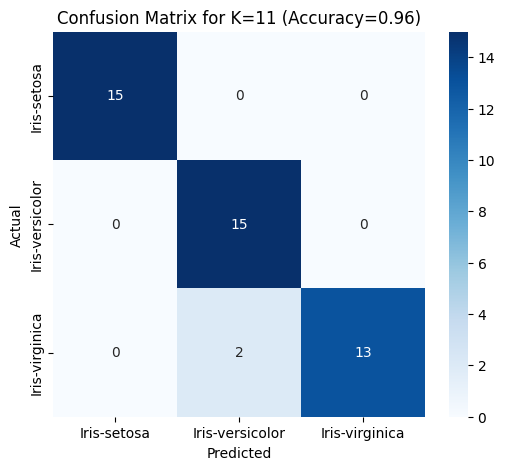

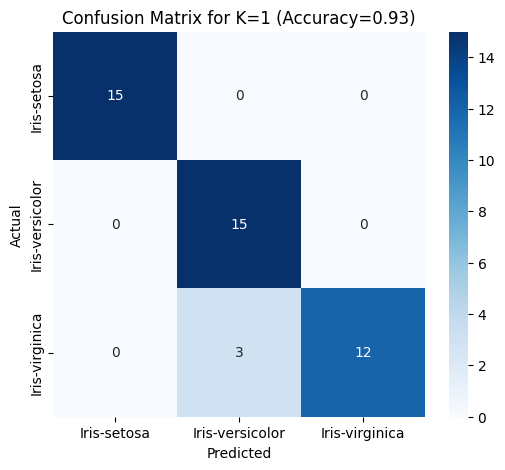

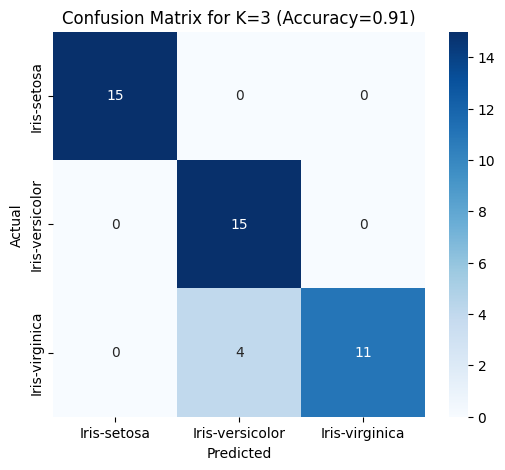

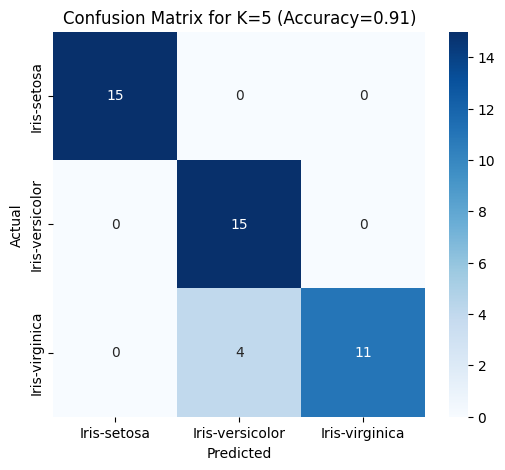

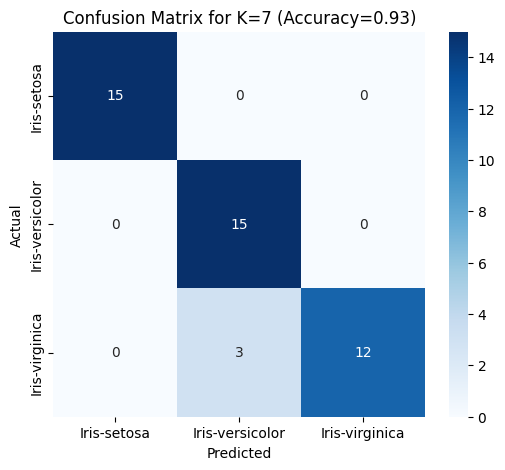

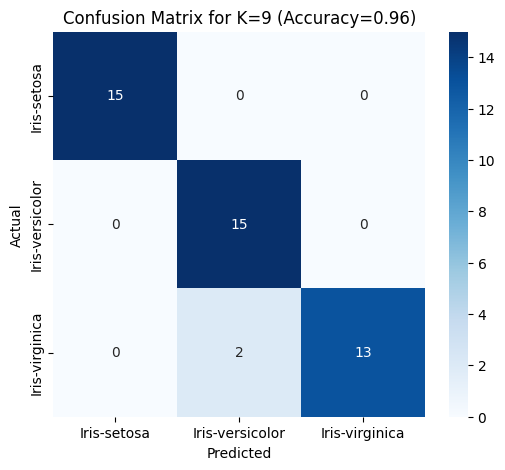

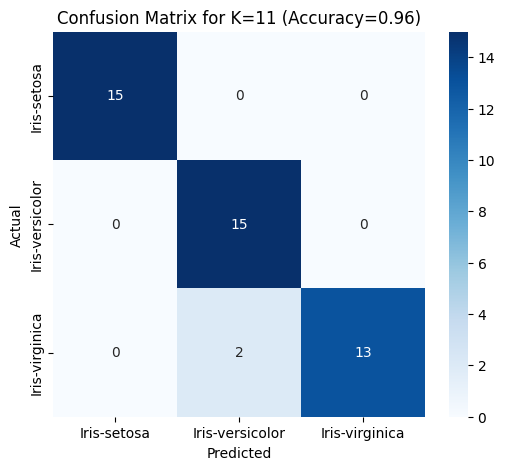

In [29]:
class_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']
for k, accuracy, cm in results:
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix for K={k} (Accuracy={accuracy:.2f})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### PCA

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
# Apply PCA (reduce to 2 components, or any number you want)
pca = PCA(n_components=2)  # or more components if needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Try different values of k for KNN and find the best one
k_values = [1, 3, 5, 7, 9, 11]
best_k = None
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use cross-validation to evaluate performance for each k
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    print(f'k={k}, Accuracy={avg_score:.2f}')
    
    if avg_score > best_score:
        best_k = k
        best_score = avg_score

print(f'\nBest k value after PCA: {best_k} with accuracy: {best_score:.2f}')

k=1, Accuracy=0.87
k=3, Accuracy=0.90
k=5, Accuracy=0.91
k=7, Accuracy=0.90
k=9, Accuracy=0.90
k=11, Accuracy=0.91

Best k value after PCA: 5 with accuracy: 0.91


#### Visualizing Decision boundary

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create a meshgrid for plotting
h = .02  # Step size in the meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the meshgrid
knn = KNeighborsClassifier(n_neighbors=best_k)  # Use the best k
knn.fit(X_train_pca, y_train)

# Classify each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Debugging: Print the type and the first few values of Z
print("Type of Z:", type(Z))
print("First few values of Z:", Z[:5])

# Check if Z contains invalid values (NaN or inf)
if not np.all(np.isfinite(Z)):
    print("Error: Z contains invalid values (NaN or inf).")
else:
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Scatter plot for the training data points
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', s=100, cmap=plt.cm.RdYlBu)

    # Add labels and a legend
    plt.title(f"Decision Boundary (k={best_k})")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Create a legend with class labels
    handles, _ = scatter.legend_elements()
    plt.legend(handles, df['Species'].unique(), loc="upper right")

    plt.show()

Type of Z: <class 'numpy.ndarray'>
First few values of Z: [['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
  'Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
  'Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
  'Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
  'Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
  'Iris-virginica' 'Iris-virginica']]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

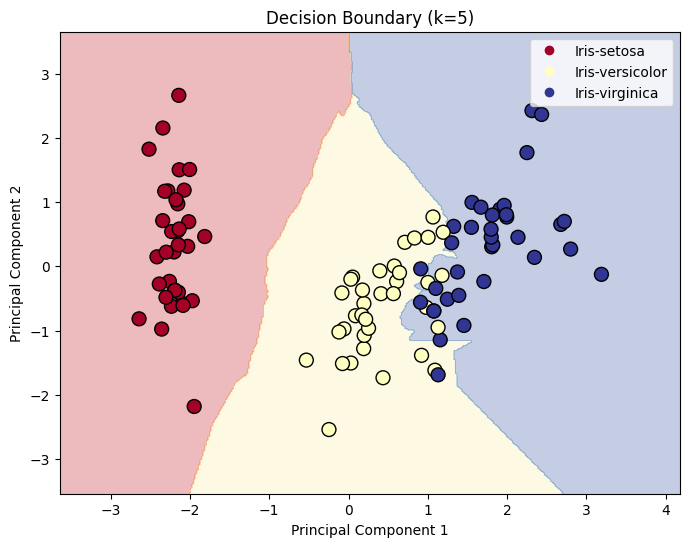

In [35]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encoding the target labels

# Create a meshgrid for plotting
h = .02  # Step size in the meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 2: Train the KNN classifier with encoded labels
knn = KNeighborsClassifier(n_neighbors=best_k)  # Use the best k
knn.fit(X_train_pca, y_train_encoded)  # Fit with numeric labels

# Step 3: Predict class labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Step 5: Scatter plot for the training data points (using numeric labels for plotting)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, edgecolors='k', s=100, cmap=plt.cm.RdYlBu)

# Step 6: Add labels and a legend
plt.title(f"Decision Boundary (k={best_k})")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Step 7: Create a legend with class labels (use LabelEncoder to reverse the encoding)
handles, _ = scatter.legend_elements()
plt.legend(handles, label_encoder.classes_, loc="upper right")  # Mapping numeric to original labels

# Show the plot
plt.show()